# Some bandwidth calculations

source: Hongler's class

The goal of this chapter is to find out how much packets we can push around, to try and estimate how much ranging sequences we can do per second.

The biggest issue when doing communication is that the radio communication system we use is half duplex: as every node wants to transmit or receive on the same medium (same frequency), two nodes cannot communicate at the same time in any direction. This also means that collisions can occur and will invalidate any communications happening at the same time. Therefore, we need to evaluate the likelihood of such interferences.

We start by assuming that the probability of a packet transmission by a node in an interval $t$ is given by a memoryless law:

\begin{equation}
f(t) = \lambda e^{-\lambda t}
\end{equation}

We note $\lambda$ the average time between two ranging measurements and $\mu$ the average time it takes for a full measurement sequence to complete.

One good approximation can be given by the M/M/1 queuing theory framework. Of course this is a bit simplistic, as the shared medium cannot hold ininitely many customers. We first start by computing the load factor $\rho = \frac{\lambda}{\mu}$.

From M/M/1, we know that $p_n = (1 - \rho) \rho^n$ is the probability of having $n$ ranging transactions at the same time. We are interested in the probability of having $n > 1$, as this creates a collision.

\begin{eqnarray}
p(n>1) &=& 1 - p_0 - p_1 \\
       &=& 1 - (1 - \rho) (1 + \rho)
\end{eqnarray}

The rate of successful measurements ($\lambda'$) is given by the rate of measurement attemps multiplied by the success rate:

\begin{equation}
\lambda' = \lambda \cdot (1 - p(n>1))
\end{equation}

In [86]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
sp.init_printing()
%matplotlib inline

In [87]:
initiate_rate, completion_rate = sp.symbols('lambda mu')
rho = initiate_rate / completion_rate

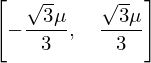

In [103]:
p_collision = 1 - (1 - rho) - (1 - rho) * rho
real_rate = (1 - p_collision) * initiate_rate
optimal_rate = sp.solve(sp.diff(real_rate, initiate_rate), initiate_rate)
optimal_rate

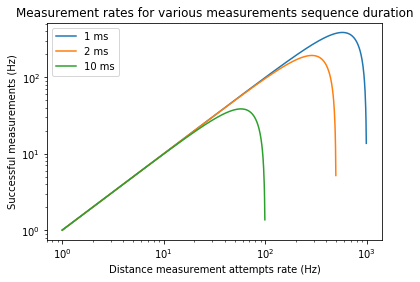

In [102]:
real_rate_num = sp.lambdify([rate, mu], real_rate)
durations = [1e-3, 2e-3, 10e-3]
legends = ['1 ms', '2 ms', '10 ms']

for measurement_sequence_duration in durations:
    f = lambda x: real_rate_num(x, 1 / measurement_sequence_duration)
    rates = np.logspace(0, 3, 1000)
    plt.loglog(rates, f(rates))
    optimal = 1 / (np.sqrt(3) * measurement_sequence_duration)

plt.xlabel('Distance measurement attempts rate (Hz)')
plt.ylabel('Successful measurements (Hz)')
plt.title('Measurement rates for various measurements sequence duration')
plt.legend(legends)